# PCA

En esta Notebook utilizaremos un modelo de Machine Learning NO supervisado: PCA (Principal Component Analysis - Análisis de Componentes Principales).

Se utilizará un dataset de Iris utilizado en Notebooks anteriores: https://www.kaggle.com/uciml/iris

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [134]:
#importamos las librerías que utilizaremos

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
data = pd.read_csv("Iris.csv")

In [136]:
#vemos los primeros 3 registros

data.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


In [137]:
# Creamos X que utilizaremso para realizar la reducción de dimensaionalidad

X = data.drop(columns = ["Id", "Species"])

In [138]:
X.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [139]:
#importamos el modelo PCA

from sklearn.decomposition import PCA


In [140]:
# instanciamos el modelo PCA - Hiperparametro por default: todos los componentes principales

pca = PCA()

In [141]:
# entrenamos el modelo

pca.fit(X)

PCA()

In [142]:
# vemos los componentes

pca.components_

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647],
       [-0.58099728,  0.59641809,  0.07252408,  0.54906091],
       [ 0.31725455, -0.32409435, -0.47971899,  0.75112056]])

In [144]:
# T es para cambiar el sentido de los datos
componentes = pca.components_.T
componentes.shape

(4, 4)

In [69]:
#Creamos un DataFrame con los datos de los componentes para ver la relación con las variables originales

pca_componentes = pd.DataFrame(componentes.T, index=X.columns, columns=['PC1', 'PC2', 'PC3', 'PC4'])
pca_componentes

,PC1,PC2,PC3,PC4
SepalLengthCm,0.361590,0.656540,-0.580997,0.317255
SepalWidthCm,-0.082269,0.729712,0.596418,-0.324094
PetalLengthCm,0.856572,-0.175767,0.072524,-0.479719
PetalWidthCm,0.358844,-0.074706,0.549061,0.751121


In [70]:
#transformamos los datos originales con el entrenamiento del modelo

data_pca = pca.fit_transform(X)

In [73]:
# Creamos un DataFrame con los datos transformados poniendo como indice la especie

data_pca = pd.DataFrame(data_pca, columns=['PC1', 'PC2', 'PC3', 'PC4'],index=data["Species"])
data_pca.head(5)

,PC1,PC2,PC3,PC4
Species,,,,
Iris-setosa,-2.684207,0.326607,-0.021512,0.001006
Iris-setosa,-2.715391,-0.169557,-0.203521,0.099602
Iris-setosa,-2.889820,-0.137346,0.024709,0.019305
Iris-setosa,-2.746437,-0.311124,0.037672,-0.075955
Iris-setosa,-2.728593,0.333925,0.096230,-0.063129


In [74]:
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
#data.columns

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

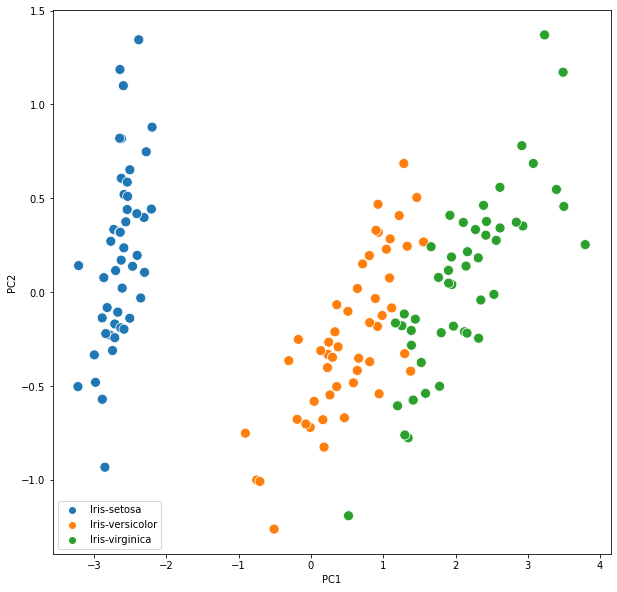

In [76]:
#Graficaremos los datos del dataset Iris en 2 dimensiones

plt.subplots(figsize = (10, 10))
sns.scatterplot(data = data_pca, x = "PC1", y = "PC2", s=100, hue=data_pca.index.tolist())


Text(0, 0.5, 'Segunda componente principal')

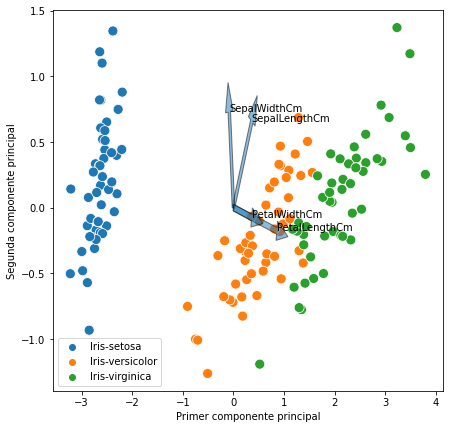

In [94]:
plt.subplots(figsize = (7, 7))

# Hacemos un scatter de los datos en las dos primeras componentes
sns.scatterplot(data = data_pca, x = "PC1", y = "PC2", s=100, hue=data_pca.index.tolist())

# Ploteamos las líneas de referencia
#plt.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
#plt.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')

# Hacemos el grafico de las flechas indicando las direcciones de los features originales

# Recorremos cada feature
for i in range(len(features)):

  # Creamos una flecha que vaya del origen y apunte en la dirección de los features
  plt.arrow(0, 0, componentes.T[i][0], componentes.T[i][1], width = 0.05, alpha = 0.5)

  # Indicamos con texto a qué feature corresponde cada flecha
  plt.text(componentes.T[i][0], componentes.T[i][1], s = features[i], fontdict= {'color': 'k', 'size': 10})

plt.xlabel('Primer componente principal')
plt.ylabel('Segunda componente principal')


## PCA Caras

Para poder tener otra visualización de lo que sucede al reducir la dimensionalidad, utilizaremos un dataset de Caras importado de Scikit-Learn. 

Está parte está basada en una Clase del Laboratorio de Datos - Facultad de Exactas - UBA http://materias.df.uba.ar/lda2021c1/171-2/

In [96]:
#Importamos el dataset de Scikit-Learn

from sklearn.datasets import fetch_olivetti_faces # para cargar el dataset de caras
data, targets = fetch_olivetti_faces(return_X_y = True) # cargamos las caras

data.shape

(400, 4096)

Vamos a visualizar algunas caras al azar.  para ver como esta compuesto el dataset.
Cada una de las caras está descrito por un vector de 4096 píxeles. Es decir, esta compuesto por 400 caras de 4096 features.

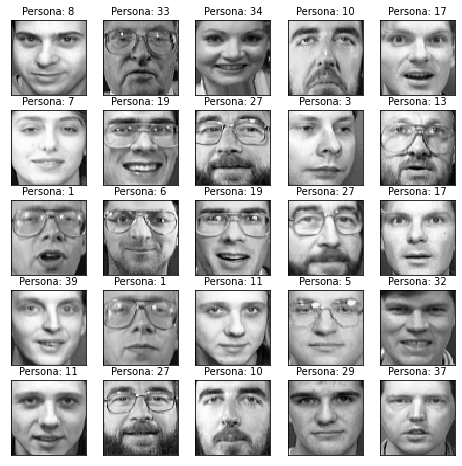

In [98]:
import numpy as np

# Ploteo 25 imagenes al azar
fig = plt.figure(figsize = (8,8)) # seteo el tamano de la figura
for i in range(25):
    j = np.random.randint(0, data.shape[0]) # en cada iteracion elijo un numero random entre 0 y la longitud de train_raw 
    plt.subplot(5,5,i+1) # Voy a tener una matriz de 5x5 subplots y voy llenando en la iteracion i-esima el subplot i+1
    plt.imshow(data[j,:].reshape(64,64), interpolation='none', cmap="gray") # plotea una imagen random, pues es la imagen j-esima del set de entrenamiento, en formato (28,28) para imagenes en escala de grises (tengo que reshapear)
    plt.title("Persona: {}".format(targets[j]), fontsize = 10) # pongo el titulo a los plots con el identificador unico de la persona 
    plt.xticks([]) # le saco los ticks en el eje X
    plt.yticks([]) # le saco los ticks en el eje Y
plt.show()


### PCA

Realizaremos la reducción de dimensionalidad con 2 componentes para poder visualizarlo

In [99]:
# Intanciamos el modelo de PCA con 100 componentes
pca = PCA(n_components =2)

In [100]:
# Entrenamos los datos
pca.fit(data)

PCA(n_components=2)

In [102]:
# Transformamos los datos 

data_pca = pca.transform(data)

# (esto puede ser realizado en una sola linea con el método .fit_transform)

In [103]:
# Creamos un DataFrame con los dos componentes principales solo para poder comprenderlo

df_pca = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])
df_pca.head(5)

,PC1,PC2
0,-6.432614,-0.703668
1,-1.075895,-6.697334
2,-5.292951,-1.542511
3,-4.253577,11.327746
4,-3.962008,-3.293874


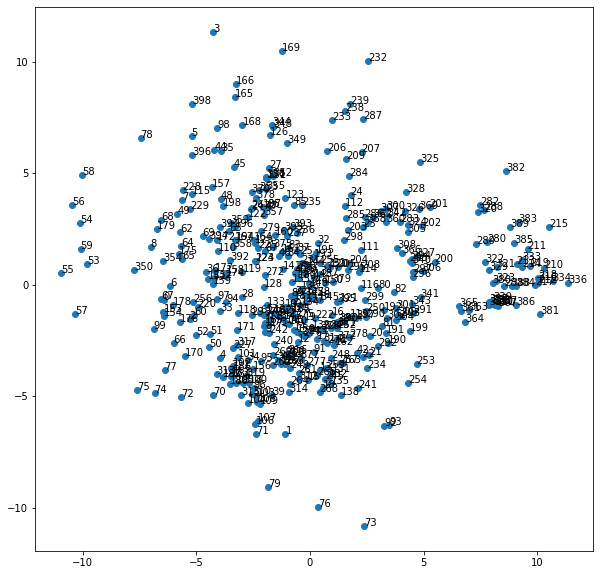

In [104]:
#Visualizamos nuestro dataset en 2 dimensiones

fig, ax = plt.subplots(figsize = (10, 10))
ax.scatter(data = df_pca, x = "PC1", y = "PC2")

# Por cada dato escribimos a qué instancia corresponde
for i in range(data.shape[0]):
   ax.text(data_pca[i, 0], data_pca[i, 1], s = i)

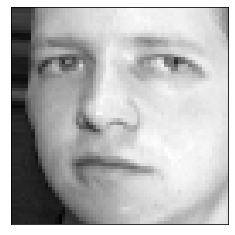

In [110]:
# Podemos visualizar alguna cara en particular

fig = plt.figure(figsize = (4,4)) # seteo el tamano de la figura
plt.imshow(data[3,:].reshape(64,64), interpolation='none', cmap="gray") # plotea una imagen random, pues es la imagen j-esima del set de entrenamiento, en formato (28,28) para imagenes en escala de grises (tengo que reshapear)
plt.xticks([]) # le saco los ticks en el eje X
plt.yticks([]) # le saco los ticks en el eje Y
plt.show()

#Ver distintos números y como son más diferentes o más parecidos de acuerdo al lugar en el espacio

### PCA con 100 componentes

Realizaremos la reducción de dimensionalidad con 100 componentes para observar cuanto se pierde en variabilidad y a su vez como cambia la resolución a medida que quitamos componentes

In [111]:
# Intanciamos el modelo de PCA con hiperparametro 100 componentes
pca_100 = PCA(n_components=100)

In [114]:
# Entrenamos el modelo PCA con 100 componentes

pca_100.fit(data)

PCA(n_components=100)

In [115]:
# Transformamos los datos

data_pca = pca_100.transform(data)
data_pca

array([[-6.4326119e+00, -7.0366895e-01, -1.4300234e+00, ...,
        -3.1662029e-01,  1.6551018e-02, -1.1875896e-01],
       [-1.0758941e+00, -6.6973343e+00,  1.8428030e+00, ...,
         2.0796210e-01,  1.1208651e-01,  7.3468953e-02],
       [-5.2929497e+00, -1.5425113e+00,  2.2595370e-01, ...,
         2.1732713e-01,  4.5356452e-03, -1.6049601e-01],
       ...,
       [ 2.0407653e+00, -1.5096141e+00,  3.4487331e+00, ...,
        -1.2774822e-01, -9.1346398e-02,  3.1383157e-01],
       [-5.1652355e+00,  8.0967636e+00, -6.7100501e-01, ...,
         1.3995744e-01, -2.5104016e-01, -8.0957621e-02],
       [-1.1505021e+00,  2.4350331e+00,  1.1894965e+00, ...,
         3.6061156e-01,  3.6095297e-01, -6.7210943e-02]], dtype=float32)

#### Varianza

Es posible observar la variabilidad que aporta cada componente a los datos utilizando el atributo *explained_variance_ratio_* de Scikit Learn que indica el porcentaje de varianza explicada por cada uno de los componentes seleccionados.

* la primera componente principal explica el 24% de la varianza de los datos

* la segunda componente principal explica el 14% de la varianza de los datos

* la tercera componente principal explica el 0.08% de la varianza de los datos

* la cuarta componente principal explica el 0.04% de la varianza de los datos
...

In [147]:
pca_100.explained_variance_ratio_

array([0.23812726, 0.13993965, 0.07968619, 0.04998333, 0.03609847,
       0.0315694 , 0.02426832, 0.02036397, 0.01958114, 0.01672121,
       0.01595221, 0.01436979, 0.01246741, 0.01147134, 0.01062878,
       0.00977721, 0.0091906 , 0.00815573, 0.00753874, 0.00746985,
       0.00698577, 0.00614628, 0.00583927, 0.00569722, 0.0054619 ,
       0.00531855, 0.00513816, 0.00495841, 0.00457664, 0.00441183,
       0.00402002, 0.0038419 , 0.00361951, 0.00334542, 0.0032038 ,
       0.0031604 , 0.00305147, 0.00298635, 0.00282141, 0.00274006,
       0.00259771, 0.0025399 , 0.00244545, 0.00239838, 0.00230888,
       0.00226418, 0.00222285, 0.00220439, 0.00208911, 0.00204969,
       0.00196841, 0.00191426, 0.00185037, 0.00178929, 0.00177597,
       0.00172456, 0.00168559, 0.00164148, 0.00161868, 0.00158378,
       0.00155309, 0.00152201, 0.0014991 , 0.0014768 , 0.00142535,
       0.00140557, 0.00136745, 0.00133837, 0.00130762, 0.00128609,
       0.00127223, 0.00126046, 0.00123616, 0.00121038, 0.00117

Text(0.5, 0, 'Número de componentes principal')

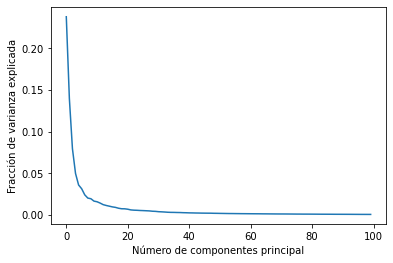

In [31]:
# Varianza 

sns.lineplot(x = range(len(pca_100.explained_variance_ratio_)), y = pca_100.explained_variance_ratio_)
plt.ylabel('Fracción de varianza explicada')
plt.xlabel('Número de componentes principal')

In [117]:
# Calculamos el acumulado con la función cumsum de numpy para poder graficar la acumulación 
 
varianza_acumulada = np.cumsum(pca_100.explained_variance_ratio_)

varianza_acumulada

array([0.23812726, 0.3780669 , 0.4577531 , 0.50773644, 0.5438349 ,
       0.57540435, 0.5996727 , 0.62003666, 0.6396178 , 0.656339  ,
       0.6722912 , 0.686661  , 0.6991284 , 0.7105997 , 0.7212285 ,
       0.73100567, 0.7401963 , 0.748352  , 0.7558907 , 0.76336056,
       0.77034634, 0.7764926 , 0.7823319 , 0.78802913, 0.79349107,
       0.7988096 , 0.80394775, 0.80890614, 0.81348276, 0.8178946 ,
       0.8219146 , 0.8257565 , 0.829376  , 0.8327214 , 0.8359252 ,
       0.83908564, 0.8421371 , 0.84512347, 0.84794486, 0.85068494,
       0.85328263, 0.8558225 , 0.85826796, 0.86066633, 0.86297524,
       0.86523944, 0.8674623 , 0.8696667 , 0.8717558 , 0.87380546,
       0.87577385, 0.8776881 , 0.8795385 , 0.88132775, 0.8831037 ,
       0.88482827, 0.8865139 , 0.88815534, 0.889774  , 0.8913578 ,
       0.8929109 , 0.8944329 , 0.895932  , 0.89740884, 0.89883417,
       0.90023977, 0.9016072 , 0.9029456 , 0.9042532 , 0.9055393 ,
       0.9068115 , 0.90807194, 0.9093081 , 0.91051847, 0.91169

Text(0.5, 0, 'Número de componentes principal')

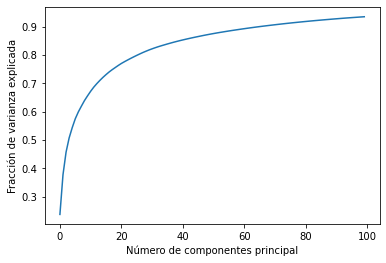

In [118]:
# Graficamos la varianza acumulada
sns.lineplot(x = range(len(pca_100.explained_variance_ratio_)), y = np.cumsum(pca_100.explained_variance_ratio_))
plt.ylabel('Fracción de varianza explicada')
plt.xlabel('Número de componentes principal')

Text(0.5, 0, 'Componentes Principales')

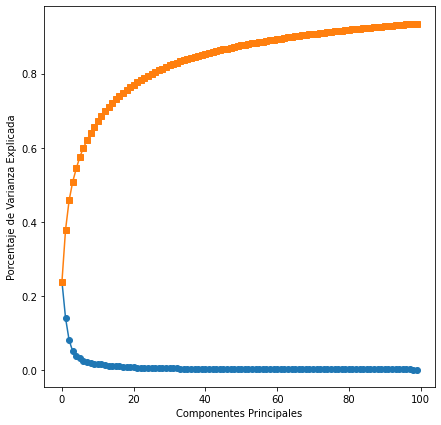

In [121]:
# Visualizamos en un mismo gráfico

plt.figure(figsize=(7,7))
plt.plot(pca_100.explained_variance_ratio_,  '-o', label='Componente individual')
plt.plot(np.cumsum(pca_100.explained_variance_ratio_), '-s',label='Acumulado')
plt.ylabel('Porcentaje de Varianza Explicada')
plt.xlabel('Componentes Principales')


Si bien los datos tienen 4096 variables (pixeles), se alcanza el 90% de la información con 60 componentes principales, es decir que se reduce la dimensionalidad sin una pérdida significativa de información.

#### Visualización de caras cambiando componentes principales

Vamos a comparar una misma cara como se ve a medida que quitamos componentes

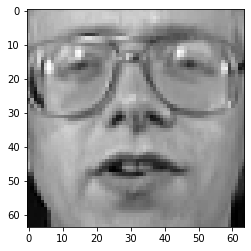

In [122]:
# Elegimos una cara de ejemplo para ver ocmo se ve original
figura = 10

plt.imshow(data[figura, :].reshape(64, 64), interpolation='none', cmap="gray") # plotea la imagen de índice faceid en formato (28,28) para imagenes en escala de grises (tengo que reshapear)
#plt.xticks([]) # le saco el eje X
#plt.yticks([]) # le saco el eje Y

Visualizamos la cara luego de realizar la reducción de dimensionalidad a 100 componentes utilizando el atributo *inverse_transform* de Sckit-Learn que transforma la data de nuevo a su espacio original. 

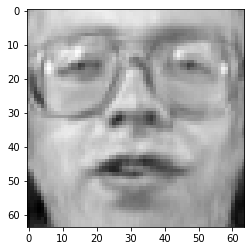

In [124]:
# Repetimos la cara seleccionada
figura = 10

# Reconstrucción de la cara desde el espacio reducido!!!
X_r = pca_100.inverse_transform(data_pca)


plt.imshow(X_r[figura, :].reshape(64, 64), interpolation='none', cmap="gray") # plotea la imagen de índice faceid en formato (28,28) para imagenes en escala de grises (tengo que reshapear)
#plt.xticks([]) # le saco el eje X
#plt.yticks([]) # le saco el eje Y

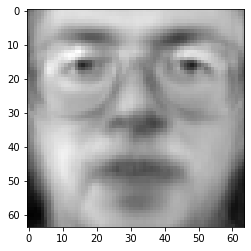

In [130]:
# Vamos a realizar la misma acción pero cambiando la cantidad de componentes. Ejemplo: 200, 50, 1, 400

#instanciamos el modelo cambiando la cantidad de componenetes
pca = PCA (n_components=10)

#entrenamos el modelo y transformamos los datos
data_pca = pca.fit_transform(data)

# Reconstruimos la cara con el espacio reducido
pca_inverse = pca.inverse_transform(data_pca)

#Visualizamos
plt.imshow(pca_inverse[figura, :].reshape(64, 64), interpolation='none', cmap="gray") # plotea la imagen de índice faceid en formato (28,28) para imagenes en escala de grises (tengo que reshapear)
#plt.xticks([]) # le saco el eje X
#plt.yticks([]) # le saco el eje Y

Cuanto más componentes principales, mejor será la reproducción de la cara original. Igualmente con pocas componentes (con muchas menos que la cantidad de features del espacio original) ya se pueden ver imagenes parecidas a la original.